# Potability Test of Water:  
#Problem Statement:- 
    Developing a model to predict the potability of water based on various parameter such as Ph Level, Hardness,   
    Turbidity, And conductivity.

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings("ignore")

### IMPORTING DATA

In [2]:
#Read the file:
data = pd.read_csv(r"C:\Users\DHANANJAY JAGTAP\Downloads\Python_Dataset\water_potability (2).csv")

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,not potable
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,not potable
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,not potable
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,not potable
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,not potable


In [4]:
data.shape #data contain 3276 rows and 10 columns

(3276, 10)

In [5]:
data.columns  #columns in the dataset.

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


Based on the mean-median values of variable input variable seems to have very close to the Normal Distrubution.

In [7]:
data.skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

In [8]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability          object
dtype: object

### DATA PREPROCESSING/CLEANING

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


#### CONVERTING CATEGORICAL COLUMN INTO NUMERIC FOR ANALYSIS

In [11]:
data.Potability.unique()

array(['not potable', 'potable'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
data.Potability = le.fit_transform(data.Potability)  

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 243.3 KB


#### CHECKING MISSING VALUES

In [15]:
data.isnull().sum() #There are some missing value in Dataset .

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### TREATING MISSING VALUES BY FILLING MEAN IN NULL VALUES

In [16]:
data.ph.fillna(data.ph.mean(),inplace = True)
data.Sulfate.fillna(data.Sulfate.mean(),inplace = True)
data.Trihalomethanes.fillna(data.Trihalomethanes.mean(),inplace = True)

In [17]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

### CHECKING OUTLIERS

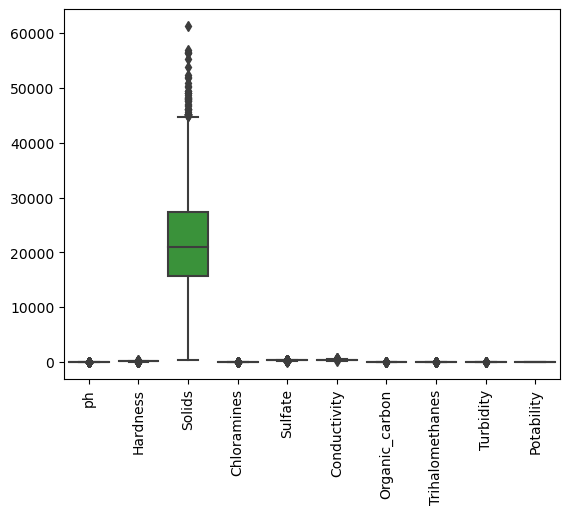

In [18]:
sns.boxplot(data=data)
plt.xticks(rotation = 90)
plt.show()

Based on the boxplot it appears that there may be outliers in the following parameters:
    Hardness,Chloramines,Sulphate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity.
But We can't remove outlier because they may be important to decide the quality of water.    

### Data Visualisation

Text(0.5, 1.0, 'Distrubution of safe and unsafe water')

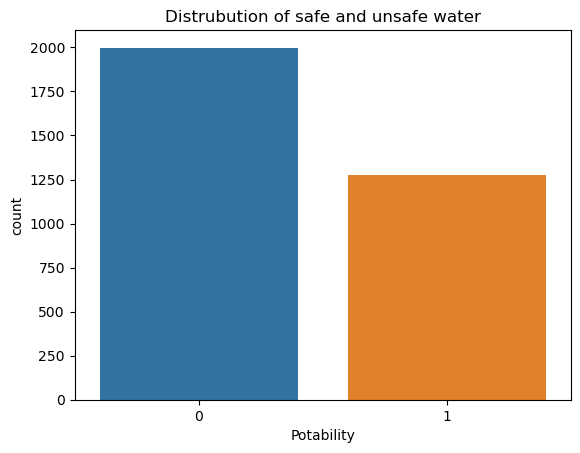

In [19]:
sns.countplot(x = 'Potability'  , data = data) 
plt.title("Distrubution of safe and unsafe water")

From above plot it shows that dataset is not balanced because sample of 0's(not Potable) is more than 1's(potable)

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

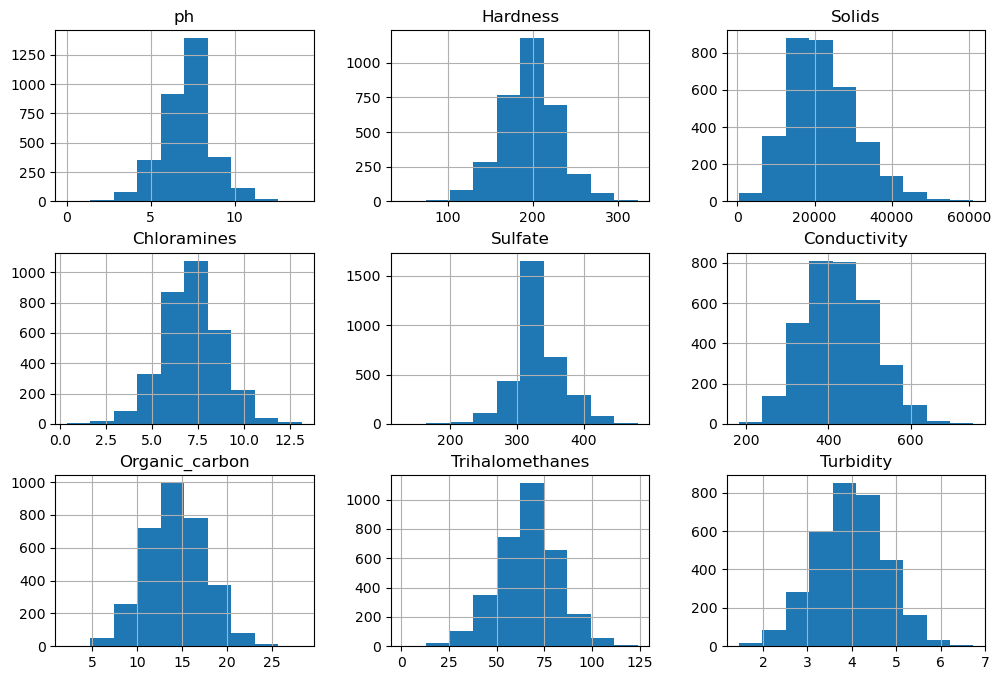

In [20]:
data.drop("Potability",axis=1).hist(figsize = (12 , 8))

From above histograms It shows that Data is very close to the Normal Distrubution.
 solids have slightly right skewed.

<Axes: >

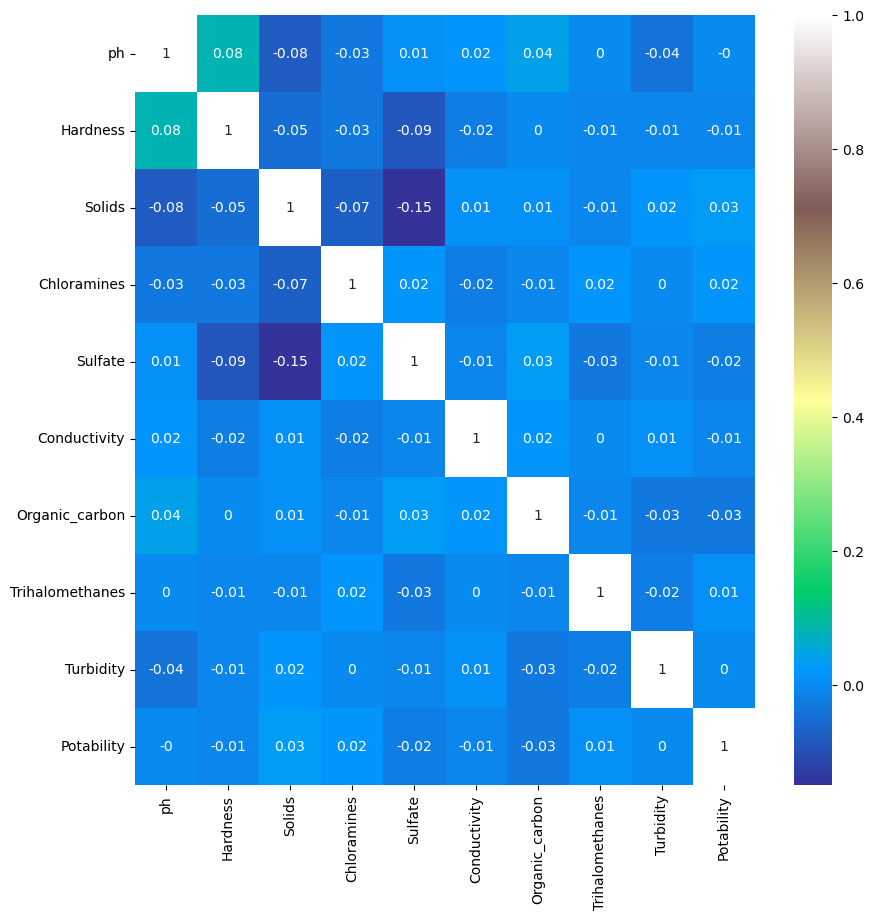

In [21]:
plt.figure(figsize = (10 , 10))
sns.heatmap(data.corr().round(2), annot = True , cmap = "terrain")

The matrix shows that there are strong positive correlations between some of the parameters, 
such as pH and hardness, and between solids and conductivity.
There are also strong negative correlations between some of the parameters, 
such as pH and sulfate, and between organic_carbon and turbidity.

In [22]:
df= pd.DataFrame(data.Potability.value_counts())
df

,Potability
0,1998
1,1278


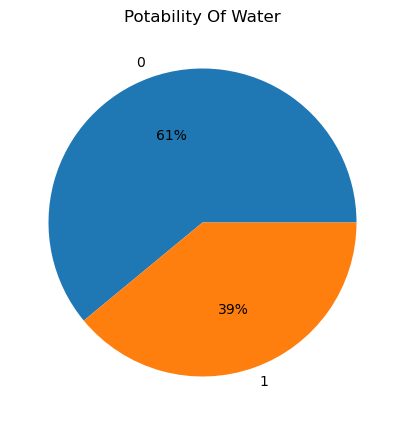

In [23]:
plt.figure(figsize = (5 , 5))
plt.pie(df.Potability , labels = df.index , autopct = '%1.0f%%')
plt.title("Potability Of Water");

Pie chart shows that 61% water is not potable and 39% water is potable.('0' indicates not Potable , '1' indicates Potable)

### SAMPLING: DIVIDING DATA INTO TRAIN AND TEST

In [24]:
from sklearn.model_selection import train_test_split
data_train , data_test = train_test_split(data , test_size = .2) #.2-->20%

In [25]:
data_train_x = data_train.iloc[:: , 0:9]
data_test_x  = data_test.iloc[:: , 0:9]
data_train_y = data_train.iloc[:: , -1]
data_test_y  = data_test.iloc[:: , -1]

In [26]:
data_train_x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3009,9.587895,195.837105,11351.86186,6.267476,366.428928,323.794862,13.068242,37.353080,4.666917
452,7.040245,192.955983,20988.42941,6.422359,320.948844,381.357350,15.396455,88.298465,3.993410
3097,6.150553,212.819377,15017.74728,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537
921,4.922045,197.287207,38494.72025,9.144953,383.239138,357.470704,13.125942,61.864580,2.291695
3003,5.582470,172.331584,23512.83796,8.011316,364.483422,452.080765,16.472045,95.045658,4.048113


In [27]:
data_test_y.head()

3196    1
1132    1
1265    0
2436    1
546     0
Name: Potability, dtype: int32

# MODEL BUILDING

### LOGISTIC REGRESSION:

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [29]:
logreg.fit(data_train_x , data_train_y)

LogisticRegression()

In [30]:
pred_train = logreg.predict(data_train_x)
pred_test  = logreg.predict(data_test_x)

In [31]:
#pred_train

In [32]:
#pred_test

#### Prediction on train data

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
matrix = confusion_matrix(data_train_y , pred_train)
matrix

array([[1592,    1],
       [1026,    1]], dtype=int64)

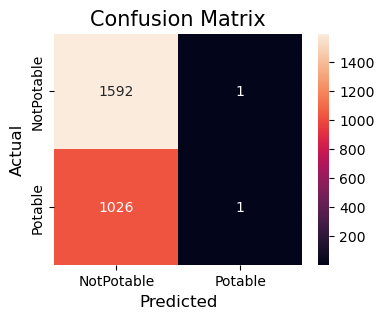

In [35]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Predicted',fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [36]:
from sklearn.metrics import accuracy_score 

In [157]:
lg = accuracy_score(data_train_y , pred_train)
lg

0.6122137404580152

#### Prediction on test data

In [38]:
matrix = confusion_matrix(data_test_y , pred_test)
matrix

array([[405,   0],
       [251,   0]], dtype=int64)

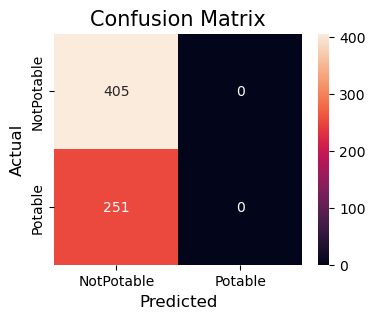

In [39]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel('Predicted',fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()           

In [40]:
accuracy_score(data_test_y , pred_test)

0.6173780487804879

### DECESION TREE

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [97]:
dt.fit(data_train_x , data_train_y)

DecisionTreeClassifier()

In [43]:
predi_train = dt.predict(data_train_x)
predi_test = dt.predict(data_test_x)

#### Prediction on train data

In [44]:
from sklearn.metrics import confusion_matrix
matrix1 = confusion_matrix(data_train_y , predi_train)
matrix1

array([[1593,    0],
       [   0, 1027]], dtype=int64)

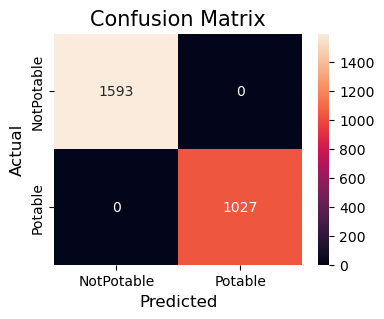

In [45]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix1 , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show() 

In [46]:
from sklearn.metrics import accuracy_score 

In [47]:
accuracy_score(data_train_y , predi_train)

1.0

Model gives 100% accuracy on train data. Model is overfit the data.

#### Prediction on test data

In [48]:
matrix1 = confusion_matrix(data_test_y , predi_test)
matrix1

array([[281, 124],
       [120, 131]], dtype=int64)

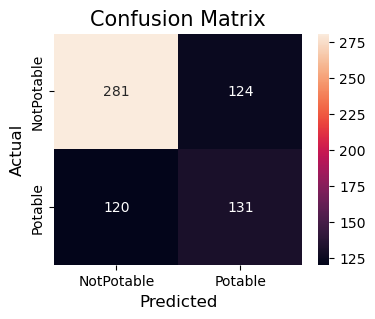

In [49]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix1 , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel("Actual",fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show() 

In [50]:
accuracy_score(data_test_y , predi_test)

0.6280487804878049

### HYPER PARAMETER

Hyper Prameter is the parameter which can user change.

#### max_depth Parameter:
It overcome the problem of overfitting ,control the branching of tree or depth of tree.

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy" , max_depth = 9)

In [52]:
dt.fit(data_train_x , data_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [53]:
pred_train_dt = dt.predict(data_train_x)
pred_test_dt = dt.predict(data_test_x)

In [156]:
dt = accuracy_score(data_train_y , pred_train_dt)
dt

0.7538167938931297

In [55]:
accuracy_score(data_test_y , pred_test_dt)

0.6341463414634146

It gives good result arround 9

#### min_sample_split Parameter:

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy" , min_samples_split = 74)

In [57]:
dt.fit(data_train_x , data_train_y)

DecisionTreeClassifier(criterion='entropy', min_samples_split=74)

In [58]:
pred_train_dt = dt.predict(data_train_x)
pred_test_dt = dt.predict(data_test_x)

In [59]:
accuracy_score(data_train_y , pred_train_dt)

0.7538167938931297

In [60]:
accuracy_score(data_test_y , pred_test_dt)

0.614329268292683

### TUNING BY GRID SEARCH

 It select the best combination of Hyper Parameter

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

search_dict = {"criterion" : ["gini" , "entropy"],
              "max_depth" : range(4 , 10), #branches
              "min_samples_split" : [50 , 74 , 100]} #parent

In [62]:
from sklearn.tree import DecisionTreeClassifier
grid = GridSearchCV(dt , param_grid = search_dict)

In [63]:
grid.fit(data_train_x , data_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              min_samples_split=74),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                         'min_samples_split': [50, 74, 100]})

In [64]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 50}

### Cross-Validation

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [90]:
score_dt = cross_val_score(dt, data_train_x , data_train_y , cv = 19)

In [91]:
score_dt

array([0.60144928, 0.56521739, 0.57971014, 0.60144928, 0.57971014,
       0.57971014, 0.58695652, 0.65217391, 0.60869565, 0.69565217,
       0.60869565, 0.51449275, 0.58695652, 0.52898551, 0.65217391,
       0.58695652, 0.5942029 , 0.6350365 , 0.53284672])

In [92]:
score_dt.max()

0.6956521739130435

In [93]:
score_dt.min()

0.5144927536231884

In [94]:
score_dt.mean()

0.5942669272355756

### Important Feature

In [98]:
dt.feature_importances_  #higher the value more significant is the variable

array([0.11537734, 0.13661754, 0.10503049, 0.1391616 , 0.12131878,
       0.09014975, 0.08008952, 0.10198319, 0.11027179])

In [99]:
dt.feature_importances_.sum()

0.9999999999999999

In [100]:
len(dt.feature_importances_)

9

In [101]:
data_train_x.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [102]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = data_train_x.columns
feat_imp['Important'] = dt.feature_importances_
feat_imp.sort_values('Important' , ascending = False)

,Features,Important
3,Chloramines,0.139162
1,Hardness,0.136618
4,Sulfate,0.121319
0,ph,0.115377
8,Turbidity,0.110272
2,Solids,0.105030
7,Trihalomethanes,0.101983
5,Conductivity,0.090150
6,Organic_carbon,0.080090


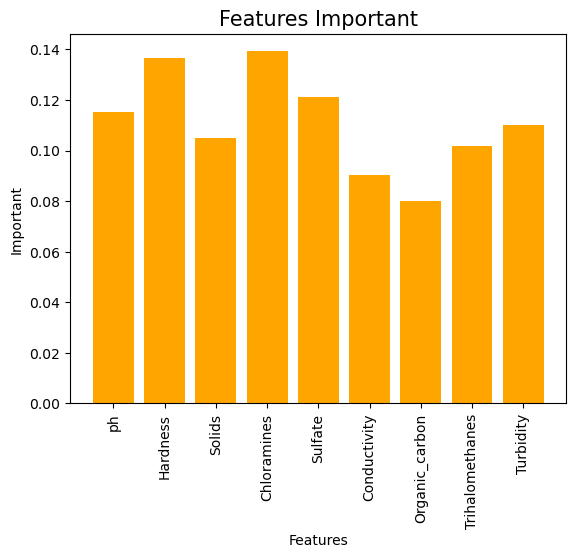

In [103]:
plt.bar(feat_imp['Features'] , feat_imp['Important'] , color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel('Features',size = 10)
plt.ylabel('Important',size = 10)
plt.title('Features Important',size = 15);

### Ada_Boost

In [105]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
abc = AdaBoostClassifier(dt, n_estimators = 5)

In [106]:
abc.fit(data_train_x , data_train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_estimators=5)

In [107]:
pred_train = abc.predict(data_train_x)
pred_test  = abc.predict(data_test_x)

In [108]:
matrix = confusion_matrix(data_train_y , pred_train)
matrix

array([[1582,    0],
       [   0, 1038]], dtype=int64)

In [109]:
matrix.diagonal().sum()/matrix.sum()

1.0

In [110]:
matrix = confusion_matrix(data_test_y , pred_test)
matrix

array([[260, 156],
       [121, 119]], dtype=int64)

In [111]:
matrix.diagonal().sum()/matrix.sum()

0.5777439024390244

### RANDOM FOREST

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 trees
                               criterion="gini",
                               max_depth=8,  # each tree will have 4 branches
                               min_samples_split=25,# each tree will have parent node
                               min_samples_leaf=12,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number of tree we want  

Model.fit(data_train_x, data_train_y)

RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=25,
                       n_estimators=20)

In [105]:
pred_rf_train = Model.predict(data_train_x)
pred_rf_test  = Model.predict(data_test_x)

#### Prediction on train data

In [106]:
matrix_rf = confusion_matrix(data_train_y , pred_rf_train)
matrix_rf

array([[1563,   30],
       [ 724,  303]], dtype=int64)

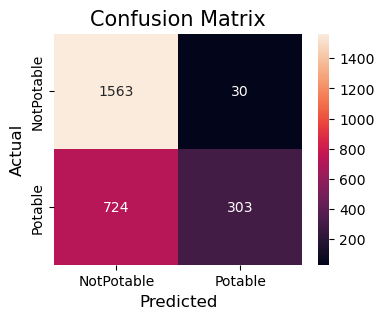

In [107]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix_rf , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [108]:
from sklearn.metrics import accuracy_score 

In [155]:
rf = accuracy_score(data_train_y , pred_rf_train)
rf

0.7122137404580152

#### Prediction on test data

In [110]:
matrix_rf = confusion_matrix(data_test_y , pred_rf_test)
matrix_rf

array([[383,  22],
       [207,  44]], dtype=int64)

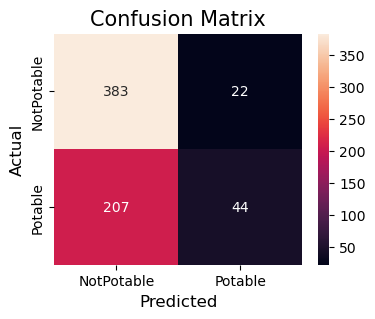

In [111]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix_rf , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [112]:
accuracy_score(data_test_y , pred_rf_test)

0.6509146341463414

### Feature_Importances

In [113]:
Model.feature_importances_

array([0.17025362, 0.10105066, 0.10344938, 0.13025102, 0.24297639,
       0.06401512, 0.06436324, 0.06243552, 0.06120504])

In [114]:
Model.feature_importances_.sum()

1.0000000000000002

In [115]:
len(Model.feature_importances_)

9

In [116]:
data_train_x.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [117]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = data_train_x.columns
feat_imp['Important'] = Model.feature_importances_
feat_imp.sort_values('Important' , ascending = False)

,Features,Important
4,Sulfate,0.242976
0,ph,0.170254
3,Chloramines,0.130251
2,Solids,0.103449
1,Hardness,0.101051
6,Organic_carbon,0.064363
5,Conductivity,0.064015
7,Trihalomethanes,0.062436
8,Turbidity,0.061205


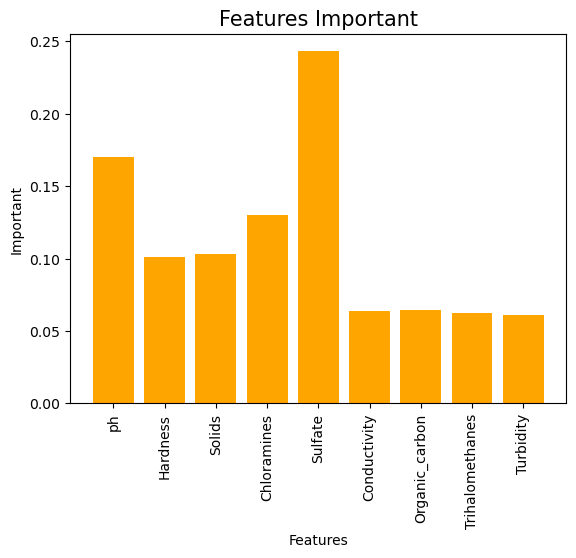

In [118]:
plt.bar(feat_imp['Features'] , feat_imp['Important'] , color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel('Features',size = 10)
plt.ylabel('Important',size = 10)
plt.title('Features Important',size = 15);

### TUNING BY GRID SEARCH

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

search_dict = {"criterion" : ["gini" , "entropy"],
              "max_depth" : range(4 , 9), #branches
              "min_samples_split" : [25 , 50 , 100]} #parent

In [120]:
from sklearn.tree import DecisionTreeClassifier
grid = GridSearchCV(dt , param_grid = search_dict)

In [121]:
grid.fit(data_train_x , data_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [25, 50, 100]})

In [122]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 25}

### Ada_Boost

In [123]:
from sklearn.ensemble import AdaBoostClassifier
rf = RandomForestClassifier(criterion = 'entropy')
abc = AdaBoostClassifier(rf , n_estimators = 100)

In [124]:
abc.fit(data_train_x , data_train_y)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy'),
                   n_estimators=100)

In [125]:
pred_test = abc.predict(data_test_x)
pred_train = abc.predict(data_train_x)

In [126]:
matrix = confusion_matrix(data_test_y , pred_test)
matrix

array([[356,  49],
       [173,  78]], dtype=int64)

In [127]:
matrix.diagonal().sum()/matrix.sum()

0.6615853658536586

In [128]:
matrix1 = confusion_matrix(data_train_y , pred_train)
matrix

array([[356,  49],
       [173,  78]], dtype=int64)

In [129]:
matrix1.diagonal().sum()/matrix1.sum()

1.0

### SVM(Support Vector Machine)

In [130]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [131]:
svc.fit(data_train_x , data_train_y)

SVC(kernel='linear')

In [132]:
pred_train = svc.predict(data_train_x)
pred_test = svc.predict(data_test_x)

#### Prediction on train data

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
matrix = confusion_matrix(data_train_y , pred_train)
matrix

array([[1590,    3],
       [1021,    6]], dtype=int64)

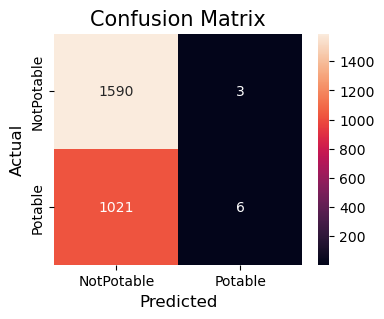

In [135]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [136]:
from sklearn.metrics import accuracy_score 

In [138]:
svm = accuracy_score(data_train_y , pred_train)
svm

0.6091603053435114

#### Prediction on test data

In [139]:
matrix = confusion_matrix(data_test_y , pred_test)
matrix

array([[405,   0],
       [247,   4]], dtype=int64)

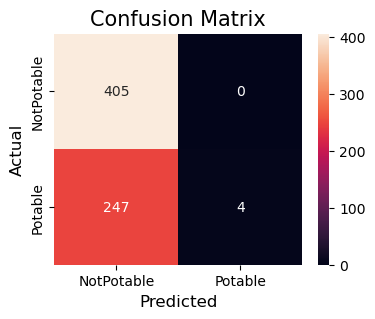

In [140]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [141]:
from sklearn.metrics import accuracy_score 

In [142]:
accuracy_score(data_test_y , pred_test)

0.6234756097560976

### KNN(K-nearest neighbour)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 54) #n_neighbors= no.of 'k'

In [144]:
knn.fit(data_train_x , data_train_y)

KNeighborsClassifier(n_neighbors=54)

#### Prediction on train data

In [145]:
pred_train = knn.predict(data_train_x)

In [146]:
matrix = confusion_matrix(data_train_y , pred_train)
matrix

array([[1540,   53],
       [ 963,   64]], dtype=int64)

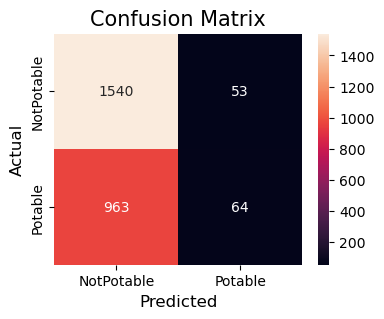

In [147]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [148]:
from sklearn.metrics import accuracy_score 

In [149]:
kn = accuracy_score(data_train_y , pred_train)
kn

0.6122137404580152

#### Prediction on test data

In [150]:
pred_test = knn.predict(data_test_x)

In [151]:
matrix = confusion_matrix(data_test_y , pred_test)
matrix

array([[388,  17],
       [241,  10]], dtype=int64)

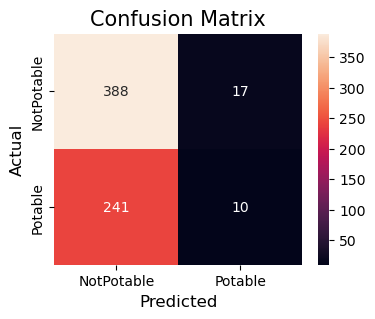

In [152]:
plt.figure(figsize = (4,3))
sns.heatmap(matrix , annot=True , fmt='g',
           xticklabels=['NotPotable' , 'Potable'],
           yticklabels=['NotPotable' , 'Potable'])
plt.ylabel('Actual',fontsize=12)
plt.xlabel("Predicted",fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
accuracy_score(data_test_y , pred_test)

0.6067073170731707

### Accuracy_score:

In [164]:
df = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','SVM','KNN'],
                  'Accuracy_score':[lg, dt, rf, svm, kn]})
df

,Model,Accuracy_score
0,Logistic Regression,0.612214
1,Decision Tree,0.753817
2,Random Forest,0.712214
3,SVM,0.609160
4,KNN,0.612214


,Model,Accuracy_score
1,Decision Tree,0.753817
2,Random Forest,0.712214
0,Logistic Regression,0.612214
4,KNN,0.612214
3,SVM,0.609160


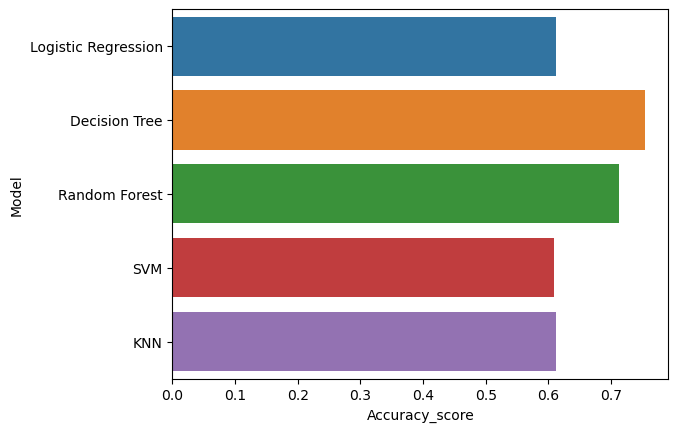

In [165]:
sns.barplot(x = 'Accuracy_score' , y = 'Model' , data = df)
df.sort_values('Accuracy_score' , ascending = False)

#### Conclusion: Here we select Decision Tree is a Best Model with High Acuuracy